# Unidad 1: Introducción al Análisis Multivariado



## Repaso de la sesión de motivación: UFC

En la sesión anterior, exploramos el análisis de un conjunto de datos de la UFC.  Aunque a simple vista pueda parecer un tema alejado de la actuaría, vimos cómo este dataset nos ofrece una valiosa oportunidad para comprender y aplicar los conceptos del Análisis Multivariado (AM).

**Recordemos algunos puntos clave**:

+ **¿Qué es el AM?** :  El AM nos permite analizar múltiples variables simultáneamente para comprender sus relaciones y patrones.  Esto es esencial en la actuaría, donde los problemas suelen involucrar múltiples factores que interactúan entre sí.

+ **Aplicaciones en la actuaría**:  Vimos cómo el AM puede ser utilizado para:

  + **Modelar riesgos complejos**: Considerando múltiples variables que influyen en la probabilidad de un evento, como una reclamación o un siniestro.
  + **Predecir resultados**: Construyendo modelos que predicen la probabilidad de un evento en función de diferentes variables.
  + **Segmentar clientes**: Agrupando asegurados con características similares para personalizar las pólizas y las estrategias de marketing.

+ **Ejemplos con el dataset de la UFC**:

  + **Análisis univariado**: Exploramos la distribución de la edad de los peleadores, observando un ligero sesgo hacia la derecha, lo que indica una mayor cantidad de peleadores jóvenes.

  + **Análisis bivariado**: Analizamos la relación entre la altura y el alcance de los peleadores, encontrando una fuerte correlación positiva. También exploramos la relación entre la postura de combate y el método de finalización de la pelea.

  + **Análisis multivariado**: Introdujimos el concepto de PCA y vimos cómo puede ser utilizado para reducir la dimensionalidad de los datos y visualizar patrones complejos.


**Conectando con la Unidad 1**:

En esta unidad, profundizaremos en los fundamentos del AM,  explorando los diferentes tipos de variables y las técnicas de análisis más utilizadas.  Los ejemplos que vimos con el dataset de la UFC nos servirán como base para comprender la aplicación del AM en la práctica.

# Definición de AM

El Análisis Multivariado (AM) es un conjunto de métodos estadísticos utilizados para analizar datos que consisten en la medición de múltiples variables sobre cada individuo u objeto de estudio.  A diferencia del análisis univariado o bivariado, que se centran en una o dos variables a la vez, el AM permite explorar las relaciones complejas entre múltiples variables de forma simultánea.

# Objetivos generales del AM

## Explorar relaciones entre variables
Consiste en identificar patrones de asociación, correlación e influencia entre múltiples variables.

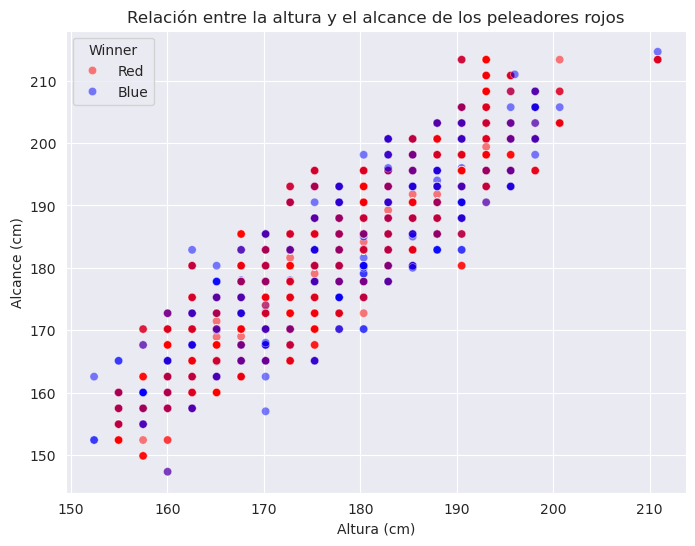

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset de la UFC
ufc_data = pd.read_csv('ufc-master.csv')


# 1. Scatter plot de la altura vs. el alcance, con colores por el ganador
plt.figure(figsize=(8, 6))
sns.scatterplot(x='RedHeightCms', y='RedReachCms', hue='Winner', data=ufc_data, alpha=0.5, palette={'Red': 'red', 'Blue': 'blue'})
plt.title('Relación entre la altura y el alcance de los peleadores rojos')
plt.xlabel('Altura (cm)')
plt.ylabel('Alcance (cm)')
plt.show()



Este código genera un gráfico de dispersión (scatter plot) que muestra la relación entre dos variables:

Eje X (`x='RedHeightCms'`): Representa la altura de los peleadores rojos en centímetros.

Eje Y (`y='RedReachCms'`): Representa el alcance de los peleadores rojos en centímetros.

Además, los puntos en el gráfico están coloreados según el ganador del combate (`hue='Winner'`), lo que permite visualizar si hay alguna tendencia o patrón relacionado con quién ganó el combate.

Los criterios de clasificación en este gráfico son:

+ **Color de los puntos** (`hue='Winner'`): Los puntos se colorean según el valor de la columna 'Winner' en el DataFrame ufc_data. Los valores posibles son 'Red' y 'Blue', que representan al ganador del combate.

  + **Rojo**: Indica que el peleador rojo ganó el combate.

  + **Azul**: Indica que el peleador azul ganó el combate.

+ **Transparencia** (`alpha=0.5`): Los puntos son semi-transparentes para facilitar la visualización cuando hay superposición de puntos.

+ **Paleta de colores** (`palette={'Red': 'red', 'Blue': 'blue'}`): Se asigna el color rojo a los puntos donde el ganador es 'Red' y el color azul a los puntos donde el ganador es 'Blue'.



Observando el gráfico, podemos identificar algunos patrones o incluso formularnos preguntas:

+ **Correlación positiva**: Como mencionamos antes, hay una clara correlación positiva entre la altura y el alcance. Esto significa que los peleadores más altos tienden a tener un mayor alcance.

+ **Diferencia entre ganadores y perdedores**: ¿Hay alguna tendencia a que los peleadores que ganan (puntos rojos) estén ubicados en la parte superior derecha del gráfico, es decir, tienden a tener mayor altura y mayor alcance?. Si hay diferencia, ¿qué tan marcada es?

In [12]:
correlation = ufc_data['RedHeightCms'].corr(ufc_data['RedReachCms'])
print(f"Correlación entre la altura y el alcance: {correlation:.2f}")

Correlación entre la altura y el alcance: 0.90


In [13]:
# Calcular la media de la altura y el alcance para los ganadores (Red)
mean_height_winners = ufc_data.loc[ufc_data['Winner'] == 'Red', 'RedHeightCms'].mean()
mean_reach_winners = ufc_data.loc[ufc_data['Winner'] == 'Red', 'RedReachCms'].mean()

# Calcular la media de la altura y el alcance para los perdedores (Blue)
mean_height_losers = ufc_data.loc[ufc_data['Winner'] == 'Blue', 'BlueHeightCms'].mean()
mean_reach_losers = ufc_data.loc[ufc_data['Winner'] == 'Blue', 'BlueReachCms'].mean()

# Imprimir los resultados
print(f"Media de altura de los ganadores: {mean_height_winners:.2f} cm")
print(f"Media de alcance de los ganadores: {mean_reach_winners:.2f} cm")
print(f"Media de altura de los perdedores: {mean_height_losers:.2f} cm")
print(f"Media de alcance de los perdedores: {mean_reach_losers:.2f} cm")

Media de altura de los ganadores: 177.90 cm
Media de alcance de los ganadores: 182.64 cm
Media de altura de los perdedores: 177.97 cm
Media de alcance de los perdedores: 182.43 cm


Para determinar si la diferencia en las medias es estadísticamente significativa, podemos realizar un test de hipótesis. La hipótesis nula sería que no hay diferencia en la altura y el alcance entre los ganadores y los perdedores, y la hipótesis alternativa sería que sí hay una diferencia.

In [14]:
from scipy.stats import ttest_ind

# Test t para la altura
t_stat_height, p_value_height = ttest_ind(
    ufc_data.loc[ufc_data['Winner'] == 'Red', 'RedHeightCms'],
    ufc_data.loc[ufc_data['Winner'] == 'Blue', 'BlueHeightCms']
)

# Test t para el alcance
t_stat_reach, p_value_reach = ttest_ind(
    ufc_data.loc[ufc_data['Winner'] == 'Red', 'RedReachCms'],
    ufc_data.loc[ufc_data['Winner'] == 'Blue', 'BlueReachCms']
)

# Imprimir los resultados
print(f"Test t para la altura: t = {t_stat_height:.2f}, p-value = {p_value_height:.3f}")
print(f"Test t para el alcance: t = {t_stat_reach:.2f}, p-value = {p_value_reach:.3f}")

Test t para la altura: t = -0.32, p-value = 0.749
Test t para el alcance: t = 0.77, p-value = 0.442


El **p-value** para la altura (0.749) es mucho mayor que el nivel de significancia típico de 0.05. Esto significa que no hay evidencia suficiente para rechazar la hipótesis nula de que las medias de altura de los ganadores y los perdedores son iguales. En otras palabras, no se puede concluir que haya una diferencia significativa en la altura entre los dos grupos.

De manera similar, el **p-value** para el alcance (0.442) también es mayor que 0.05.  Por lo tanto, tampoco hay evidencia suficiente para rechazar la hipótesis nula de que las medias de alcance de los ganadores y los perdedores son iguales.  No se puede concluir que haya una diferencia significativa en el alcance entre los dos grupos.

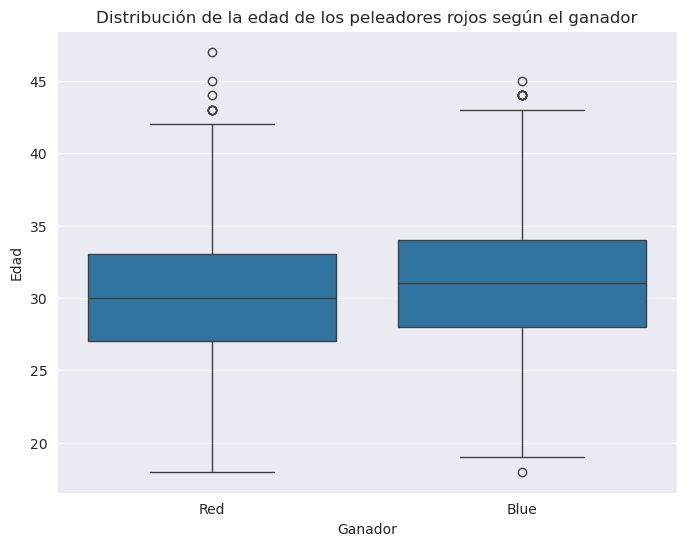

In [15]:
# 2. Boxplot de la edad según el ganador
plt.figure(figsize=(8, 6))
sns.boxplot(x='Winner', y='RedAge', data=ufc_data)
plt.title('Distribución de la edad de los peleadores rojos según el ganador')
plt.xlabel('Ganador')
plt.ylabel('Edad')
plt.show()


El código genera un boxplot (diagrama de caja) que representa la distribución de la edad (`RedAge`) de los peleadores rojos según el ganador de la pelea (`Winner`).

En este gráfico:

+ El eje X representa las dos categorías de la variable `Winner`: "Red" (peleador rojo ganador) y "Blue" (peleador azul ganador).

+ El eje Y representa la edad de los peleadores rojos.
Cada caja representa la distribución de la edad para un grupo de peleadores, ya sea los que ganaron o los que perdieron.

Con este gráfico, se intenta medir y comparar la distribución de la edad de los peleadores rojos en función de si ganaron o perdieron la pelea.  Se busca observar si hay diferencias en la edad típica (mediana), la dispersión de la edad y la presencia de valores atípicos entre los dos grupos.

Este gráfico permite visualizar de forma compacta y comparativa la distribución de una variable numérica (edad) en función de una variable categórica (ganador).  En este caso, nos ayuda a responder preguntas como:

+ ¿Hay alguna diferencia en la edad típica entre los peleadores rojos que ganan y los que pierden?

+ ¿La dispersión de la edad es similar en ambos grupos?

+ ¿Hay valores atípicos (peleadores muy jóvenes o muy mayores) en alguno de los grupos?

Observando el boxplot, podemos destacar los siguientes patrones:

+ **Mediana similar**: La línea que divide las cajas (mediana) está a una altura similar en ambos grupos. Esto sugiere que la edad típica de los peleadores rojos es similar, independientemente de si ganan o pierden.

+ **Dispersión similar**: Las cajas tienen una longitud similar, lo que indica que la dispersión o variabilidad de la edad es comparable en ambos grupos.

+ **Valores atípicos**:  Se observan algunos valores atípicos (puntos individuales) tanto en el grupo de ganadores como en el de perdedores. Esto indica que hay algunos peleadores rojos con edades inusualmente altas o bajas en ambos grupos.

En resumen, este boxplot nos muestra que, en general, no hay una diferencia clara en la distribución de la edad de los peleadores rojos según si ganan o pierden la pelea.

Para confirmar numéricamente los patrones encontrados en el boxplot de la edad de los peleadores rojos según el ganador, se pueden utilizar las siguientes estrategias:

In [16]:
# Estadísticas descriptivas de la edad de los ganadores (Red)
print("Estadísticas descriptivas de la edad de los ganadores (Red):")
print(ufc_data.loc[ufc_data['Winner'] == 'Red', 'RedAge'].describe().to_markdown(numalign="left", stralign="left"))

# Estadísticas descriptivas de la edad de los perdedores (Blue)
print("\nEstadísticas descriptivas de la edad de los perdedores (Blue):")
print(ufc_data.loc[ufc_data['Winner'] == 'Blue', 'RedAge'].describe().to_markdown(numalign="left", stralign="left"))

Estadísticas descriptivas de la edad de los ganadores (Red):
|       | RedAge   |
|:------|:---------|
| count | 3787     |
| mean  | 29.9369  |
| std   | 4.05997  |
| min   | 18       |
| 25%   | 27       |
| 50%   | 30       |
| 75%   | 33       |
| max   | 47       |

Estadísticas descriptivas de la edad de los perdedores (Blue):
|       | RedAge   |
|:------|:---------|
| count | 2741     |
| mean  | 30.9435  |
| std   | 4.27453  |
| min   | 18       |
| 25%   | 28       |
| 50%   | 31       |
| 75%   | 34       |
| max   | 45       |


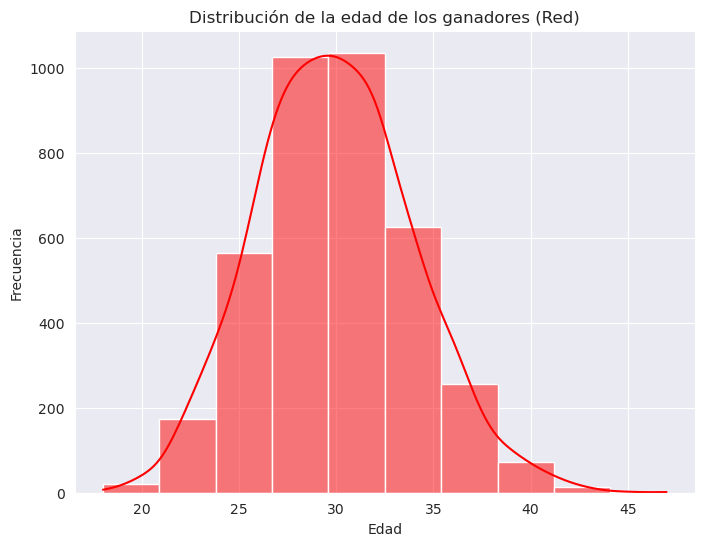

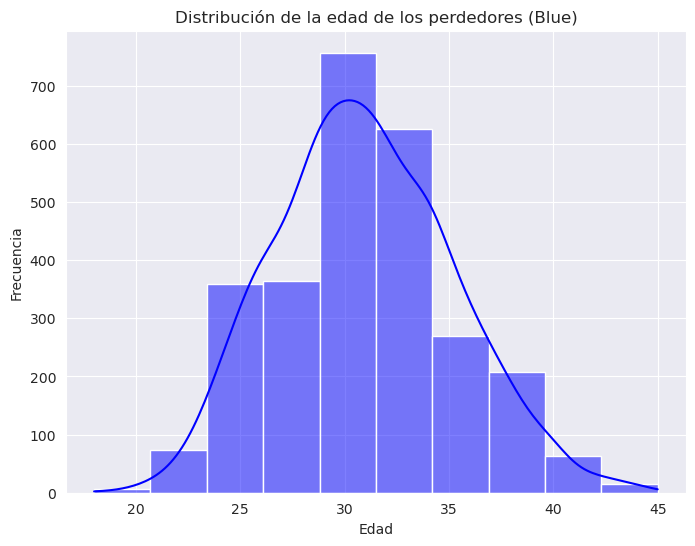

In [17]:
# Histograma de la edad de los ganadores (Red)
plt.figure(figsize=(8, 6))
sns.histplot(ufc_data.loc[ufc_data['Winner'] == 'Red', 'RedAge'], bins=10, kde=True, color='red')
plt.title('Distribución de la edad de los ganadores (Red)')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

# Histograma de la edad de los perdedores (Blue)
plt.figure(figsize=(8, 6))
sns.histplot(ufc_data.loc[ufc_data['Winner'] == 'Blue', 'RedAge'], bins=10, kde=True, color='blue')
plt.title('Distribución de la edad de los perdedores (Blue)')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

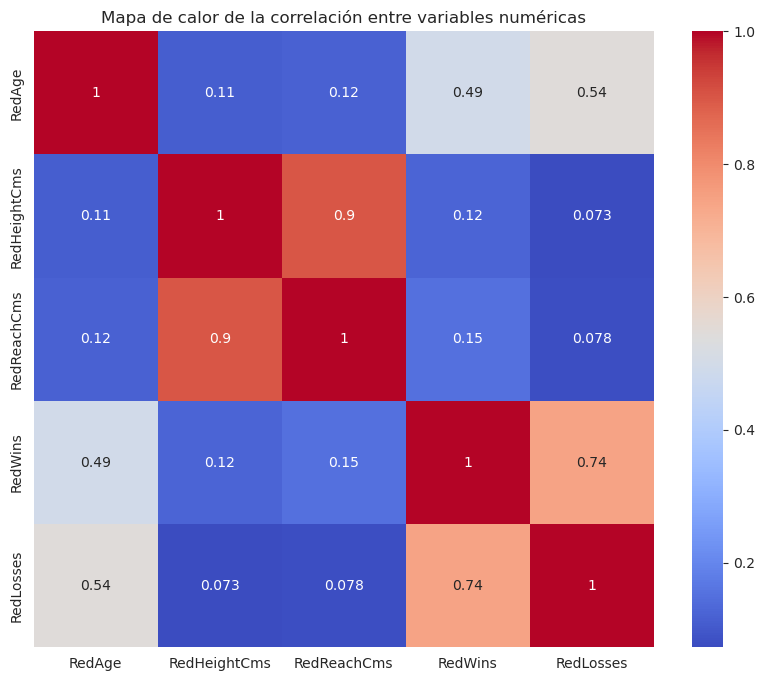

In [18]:
# 3. Mapa de calor de la correlación entre variables numéricas
numerical_vars = ['RedAge', 'RedHeightCms', 'RedReachCms', 'RedWins', 'RedLosses']
correlation_matrix = ufc_data[numerical_vars].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Mapa de calor de la correlación entre variables numéricas')
plt.show()

A partir del mapa de calor, podemos observar las siguientes relaciones entre las variables:

+ **Correlación positiva fuerte**:
  + `RedHeightCms` (altura) y `RedReachCms` (alcance): tienen una correlación de 0.90, lo que indica una relación lineal fuerte y positiva. Esto significa que, en general, a medida que aumenta la altura de un peleador, también aumenta su alcance.
  + `RedWins` (victorias) y `RedLosses` (derrotas): tienen una correlación de 0.74, lo que también indica una relación positiva fuerte. Esto sugiere que los peleadores con más victorias también tienden a tener más derrotas, lo cual puede ser explicado por el hecho de que los peleadores con más experiencia (más peleas) tienden a tener tanto más victorias como más derrotas.

+ **Correlación moderada**:

  + `RedAge` (edad) y `RedWins`: tienen una correlación de 0.49, lo que indica una relación positiva moderada. Esto sugiere que los peleadores de mayor edad tienden a tener más victorias, aunque la relación no es tan fuerte como en los casos anteriores.
  + `RedAge` (edad) y `RedLosses`: tienen una correlación de 0.54, también una relación positiva moderada. Similar al caso anterior, esto sugiere que los peleadores de mayor edad tienden a tener más derrotas.

+ **Correlación débil o nula**:

  + `RedAvgSigStrLanded` (promedio de golpes significativos conectados) tiene correlaciones débiles con las demás variables, lo que indica que no hay una relación lineal fuerte entre la efectividad de los golpes y la edad, la altura, el alcance o la experiencia del peleador.

In [19]:
import pandas as pd
from scipy.stats import pearsonr

# Cargar el dataset de la UFC
ufc_data = pd.read_csv('ufc-master.csv')

# --- Pruebas de hipótesis para la correlación ---

# 1. RedHeightCms vs. RedReachCms
corr_height_reach, p_value_height_reach = pearsonr(ufc_data['RedHeightCms'], ufc_data['RedReachCms'])
print(f"Correlación entre RedHeightCms y RedReachCms: {corr_height_reach:.2f}, p-value: {p_value_height_reach:.3f}")

# 2. RedWins vs. RedLosses
corr_wins_losses, p_value_wins_losses = pearsonr(ufc_data['RedWins'], ufc_data['RedLosses'])
print(f"Correlación entre RedWins y RedLosses: {corr_wins_losses:.2f}, p-value: {p_value_wins_losses:.3f}")

# 3. RedAge vs. RedWins
corr_age_wins, p_value_age_wins = pearsonr(ufc_data['RedAge'], ufc_data['RedWins'])
print(f"Correlación entre RedAge y RedWins: {corr_age_wins:.2f}, p-value: {p_value_age_wins:.3f}")

# 4. RedAge vs. RedLosses
corr_age_losses, p_value_age_losses = pearsonr(ufc_data['RedAge'], ufc_data['RedLosses'])
print(f"Correlación entre RedAge y RedLosses: {corr_age_losses:.2f}, p-value: {p_value_age_losses:.3f}")

Correlación entre RedHeightCms y RedReachCms: 0.90, p-value: 0.000
Correlación entre RedWins y RedLosses: 0.74, p-value: 0.000
Correlación entre RedAge y RedWins: 0.49, p-value: 0.000
Correlación entre RedAge y RedLosses: 0.54, p-value: 0.000


## Reducir la dimensionalidad de los datos

En el análisis multivariado, a menudo nos encontramos con conjuntos de datos que tienen una gran cantidad de variables. Esto puede dificultar la visualización, la interpretación y el análisis de los datos. La reducción de la dimensionalidad busca simplificar los datos encontrando un conjunto más pequeño de variables o combinaciones de variables que capturen la mayor parte de la información.

Una técnica común para la reducción de la dimensionalidad es el Análisis de Componentes Principales (PCA). El PCA encuentra combinaciones lineales de las variables originales (componentes principales) que maximizan la varianza explicada en los datos.

Ejm: https://www.kaggle.com/datasets/willianoliveiragibin/healthcare-insurance


In [20]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset de seguros
insurance_data = pd.read_csv('insurance.csv')

# Seleccionar las variables numéricas para el PCA
numerical_vars = ['age', 'bmi', 'children', 'charges']
pca_data = insurance_data[numerical_vars].dropna()  # Eliminar filas con valores faltantes

# Estandarizar las variables
scaler = StandardScaler()
scaled_data = scaler.fit_transform(pca_data)

# Aplicar PCA
pca = PCA(n_components=2)  # Reducir a 2 componentes principales
principal_components = pca.fit_transform(scaled_data)

# Crear un DataFrame con los componentes principales
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Visualizar los componentes principales con un scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', data=pca_df, alpha=0.5)
plt.title('Dos primeros componentes principales del dataset de seguros')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

# Interpretar los resultados del PCA

# Imprimir la varianza explicada por cada componente principal
print("Varianza explicada por cada componente principal:", pca.explained_variance_ratio_)

# Imprimir los pesos de cada variable en cada componente principal
print("Pesos de cada variable en cada componente principal:\n", pca.components_)

ModuleNotFoundError: No module named 'sklearn'